In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import time

import glob

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)

timestr = time.strftime("%Y%m%d%H%M")

In [2]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/fig4a/" 

1


In [3]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [4]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [5]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


In [6]:
mets2plot2_sel3met = [i[0:-1] for i in ["Mg_x_n0","NADHmito_n0", "QH2mito_n0", "CytCredmito_n0",  
            "ATPmito_n0", "ATP_mx_n0", "ATP_i_n0", "ATP_mi_n0", 
             
            "ATP_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "SUCmito_n0", "SUCCOAmito_n0", "CoAmito_n0", 
            "AKGmito_n0",  "ISOCITmito_n0", "CITmito_n0", "AcCoAmito_n0", "AcAc_n0", "AcAcCoA_n0", "PYRmito_n0", "bHB_n0", "bHB_ecs0", "bHB_b0",  "GLU_n0", 
            "NADH_n0", "Mg_x_a0",   "NADHmito_a0", "QH2mito_a0", "CytCredmito_a0",  
            "ATPmito_a0",   "ATP_mx_a0",  "ATP_i_a0",   "ATP_mi_a0",  
             
            "ATP_a0",  "FUMmito_a0", "MALmito_a0", "OXAmito_a0", "SUCmito_a0", "SUCCOAmito_a0", "CoAmito_a0", 
            "AKGmito_a0", "ISOCITmito_a0", "CITmito_a0", "AcCoAmito_a0", "PYRmito_a0", 
            "GLN_a0", "GLUT_a0", 
             
            "ddHb0", "O2cap0", 
              "Glc_b0", "Glc_t_t0", "Glc_ecsBA0", "Glc_a0", "Glc_ecsAN0", "Glc_n0", "G6P_n0", "G6P_a0", "F6P_n0", "F6P_a0", "FBP_n0", "FBP_a0", "f26bp_a0", "GLY_a0", "G1P_a0", "GAP_n0", "GAP_a0", 
              "DHAP_n0", "DHAP_a0", "BPG13_n0", "BPG13_a0", "NADH_a0", "PG3_n0", "PG3_a0", "PG2_n0", "PG2_a0", "PEP_n0", "PEP_a0", "Pyr_n0", "Pyr_a0", "Lac_b0", "Lac_ecs0", "Lac_a0", "Lac_n0", 
              "NADPH_n0", "NADPH_a0", "R5P_n0", "R5P_a0",  "E4P_n0", "E4P_a0", 
              "GSH_n0", "GSH_a0", "cAMP_a0"
]]

len(mets2plot2_sel3met)


94

In [7]:
input_file_ids = sorted(input_file_ids)

In [8]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0].replace("_"," ")
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [9]:
print(input_df.shape)

(58900, 185)


In [10]:
startid = 180
endid = int(input_df['time_s'].max())

In [11]:
input_df = input_df.loc[:,mets2plot2_sel3met+['condition','time_s']]

In [12]:
input_df_mp = input_df.loc[(input_df['time_s']>=startid),:].copy()  
input_df_mp = input_df_mp.drop(columns='time_s')
startid

180

In [13]:
def ccv(x):
    if np.mean(x) !=0:
        return np.std(x)/np.mean(x)
    else:
        return 0

input_df_data2 = input_df_mp.groupby('condition').agg([np.mean,np.median,np.max,np.min,ccv]) #.melt(ignore_index=False).reset_index()

In [14]:
input_df_data2.head(3)

Mg_x_n                                         NADHmito_n  \
                     mean    median      amax      amin       ccv       mean   
condition                                                                      
1 blood glc ini  0.632960  0.636766  0.640518  0.617168  0.012840   0.316774   
10 lac pls       0.631750  0.636420  0.639592  0.614536  0.014159   0.316967   
11 bhb pls       0.631742  0.636452  0.639592  0.614408  0.014239   0.316918   

                                                         ...     GSH_a  \
                   median      amax      amin       ccv  ...      mean   
condition                                                ...             
1 blood glc ini  0.315259  0.354367  0.272225  0.055510  ...  4.299998   
10 lac pls       0.315169  0.354783  0.271986  0.055791  ...  4.299998   
11 bhb pls       0.315407  0.354614  0.271986  0.055922  ...  4.299997   

                                                               cAMP_a  \
                   median      amax      amin           ccv      mean   
condition                                                               
1 blood glc ini  4.299998  4.299999  4.299997  1.219881e-07  0.038962   
10 lac pls       4.299998  4.299998  4.299997  6.258639e-08  0.038978   
11 bhb pls       4.299997  4.299998  4.299997  1.293971e-07  0.038979   

                                                         
                   median      amax      amin       ccv  
condition                                                
1 blood glc ini  0.039058  0.039097  0.038631  0.003985  
10 lac pls       0.039073  0.039110  0.038651  0.003943  
11 bhb pls       0.039077  0.039110  0.038652  0.003946  

[3 rows x 470 columns]

In [15]:
input_df_data2 = input_df_data2.reset_index(drop=False)
input_df_mp_cvAmpl_l = pd.melt(input_df_data2,id_vars=['condition'])

In [16]:
input_df_mp_cvAmpl_l.head(3)

,condition,variable_0,variable_1,value
0,1 blood glc ini,Mg_x_n,mean,0.632960
1,10 lac pls,Mg_x_n,mean,0.631750
2,11 bhb pls,Mg_x_n,mean,0.631742


In [17]:
def get_cmps_index(df):
    cmps1 = []
    for i in df['variable_0'].to_list():
       
        if i in ['ddHb','O2cap']:
            cmps1.append("b_ecs")
                
        elif len(i.split("_")) >1:
            if i.split("_")[-1] == "ecsAN":
                cmps1.append("b_ecs")
                
            elif i.split("_")[-1] == "ecsBA":
                cmps1.append("b_ecs")
                
            elif i.split("_")[-1] == "ecs":
                cmps1.append("b_ecs")
                
            elif i.split("_")[-1] == "t":
                cmps1.append("b_ecs")
                
            elif i.split("_")[-1] == "b":
                cmps1.append("b_ecs")
                
            elif i.split("_")[-1] == "out":
                cmps1.append("b_ecs")
                
            else:
                cmps1.append(i.split("_")[-1].rstrip("0"))
        else:
            #print(i)
            cmps1.append("other")
            
    return cmps1

cmps = get_cmps_index(input_df_mp_cvAmpl_l)

In [18]:
set(cmps)

{'a', 'b_ecs', 'n'}

In [19]:
input_df_mp_cvAmpl_l['cmps'] = cmps
input_df_mp_cvAmpl_l.head(3)

,condition,variable_0,variable_1,value,cmps
0,1 blood glc ini,Mg_x_n,mean,0.632960,n
1,10 lac pls,Mg_x_n,mean,0.631750,n
2,11 bhb pls,Mg_x_n,mean,0.631742,n


In [20]:
cmps_d = dict(zip(input_df_mp_cvAmpl_l['variable_0'],input_df_mp_cvAmpl_l['cmps']))

In [21]:
fid = '202303211313'
with open(f"data/v2function_{fid}.json","r") as f:
    v2function = json.load(f)

lut_funs = {'keto': '#a6cee3',
 'ETC': '#1f78b4',
 'TCA': '#b2df8a',
 'redox': '#33a02c',
 'ATDMP': '#fb9a99',
 'GLTGLN': '#e31a1c',
 'resp': '#fdbf6f',
 'GLCLS': '#ff7f00',
 'PPP': '#cab2d6'}

In [22]:
input_df_mp_cvAmpl_l['fns'] = input_df_mp_cvAmpl_l['variable_0'].map(v2function)

In [23]:
input_df_mp_cvAmpl_l.head(3)

,condition,variable_0,variable_1,value,cmps,fns
0,1 blood glc ini,Mg_x_n,mean,0.632960,n,ETC
1,10 lac pls,Mg_x_n,mean,0.631750,n,ETC
2,11 bhb pls,Mg_x_n,mean,0.631742,n,ETC


In [24]:
input_df_mp_cvAmpl_l = input_df_mp_cvAmpl_l.sort_values(by=['cmps','fns'],ascending=False)

In [25]:
input_df_mp_cvAmpl_l.head(3)

,condition,variable_0,variable_1,value,cmps,fns
950,1 blood glc ini,NADHmito_n,mean,0.316774,n,redox
951,10 lac pls,NADHmito_n,mean,0.316967,n,redox
952,11 bhb pls,NADHmito_n,mean,0.316918,n,redox


In [26]:
input_df_mp_cvAmpl_l[["variable_id","variable_cmp"]] = input_df_mp_cvAmpl_l['variable_0'].str.split("_",1, expand=True)

In [27]:
mypal_cmps = ['#00b7ff','#1f58a3','#8206a1']  
lut_cmps = dict(zip(['n','a','b_ecs'], mypal_cmps))

### Clustermaps

In [28]:
input_df_data2.index = input_df_data2['condition']
input_df_data2 = input_df_data2.drop(columns='condition')

input_df_data2.index = input_df_data2.index 

/gpfs/bbp.cscs.ch/ssd/apps/bsd/2022-01-10/stage_applications/install_gcc-11.2.0-skylake/py-pandas-1.3.4-exvllw/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [29]:
input_df_data2.head(3)

Mg_x_n                                         NADHmito_n  \
                     mean    median      amax      amin       ccv       mean   
condition                                                                      
1 blood glc ini  0.632960  0.636766  0.640518  0.617168  0.012840   0.316774   
10 lac pls       0.631750  0.636420  0.639592  0.614536  0.014159   0.316967   
11 bhb pls       0.631742  0.636452  0.639592  0.614408  0.014239   0.316918   

                                                         ...     GSH_a  \
                   median      amax      amin       ccv  ...      mean   
condition                                                ...             
1 blood glc ini  0.315259  0.354367  0.272225  0.055510  ...  4.299998   
10 lac pls       0.315169  0.354783  0.271986  0.055791  ...  4.299998   
11 bhb pls       0.315407  0.354614  0.271986  0.055922  ...  4.299997   

                                                               cAMP_a  \
                   median      amax      amin           ccv      mean   
condition                                                               
1 blood glc ini  4.299998  4.299999  4.299997  1.219881e-07  0.038962   
10 lac pls       4.299998  4.299998  4.299997  6.258639e-08  0.038978   
11 bhb pls       4.299997  4.299998  4.299997  1.293971e-07  0.038979   

                                                         
                   median      amax      amin       ccv  
condition                                                
1 blood glc ini  0.039058  0.039097  0.038631  0.003985  
10 lac pls       0.039073  0.039110  0.038651  0.003943  
11 bhb pls       0.039077  0.039110  0.038652  0.003946  

[3 rows x 470 columns]

In [30]:
input_df_data2.shape

(190, 470)

In [31]:
input_df_data2.head(3)

Mg_x_n                                         NADHmito_n  \
                     mean    median      amax      amin       ccv       mean   
condition                                                                      
1 blood glc ini  0.632960  0.636766  0.640518  0.617168  0.012840   0.316774   
10 lac pls       0.631750  0.636420  0.639592  0.614536  0.014159   0.316967   
11 bhb pls       0.631742  0.636452  0.639592  0.614408  0.014239   0.316918   

                                                         ...     GSH_a  \
                   median      amax      amin       ccv  ...      mean   
condition                                                ...             
1 blood glc ini  0.315259  0.354367  0.272225  0.055510  ...  4.299998   
10 lac pls       0.315169  0.354783  0.271986  0.055791  ...  4.299998   
11 bhb pls       0.315407  0.354614  0.271986  0.055922  ...  4.299997   

                                                               cAMP_a  \
                   median      amax      amin           ccv      mean   
condition                                                               
1 blood glc ini  4.299998  4.299999  4.299997  1.219881e-07  0.038962   
10 lac pls       4.299998  4.299998  4.299997  6.258639e-08  0.038978   
11 bhb pls       4.299997  4.299998  4.299997  1.293971e-07  0.038979   

                                                         
                   median      amax      amin       ccv  
condition                                                
1 blood glc ini  0.039058  0.039097  0.038631  0.003985  
10 lac pls       0.039073  0.039110  0.038651  0.003943  
11 bhb pls       0.039077  0.039110  0.038652  0.003946  

[3 rows x 470 columns]

In [32]:
input_df_data2_T = input_df_data2.T
input_df_data2_T.head(3)

condition      1 blood glc ini  10 lac pls  11 bhb pls  12 akg pls  \
Mg_x_n mean           0.632960    0.631750    0.631742    0.631736   
       median         0.636766    0.636420    0.636452    0.636436   
       amax           0.640518    0.639592    0.639592    0.639592   

condition      121 default  13 succoa pls  137 blood glc ini dose1  \
Mg_x_n mean       0.631735       0.631092                 0.630952   
       median     0.636435       0.636053                 0.636399   
       amax       0.639592       0.639592                 0.639038   

condition      138 blood glc ini dose2  139 blood glc ini dose3  14 fum pls  \
Mg_x_n mean                   0.632398                 0.633464    0.631459   
       median                 0.636631                 0.636938    0.636165   
       amax                   0.640087                 0.640898    0.639592   

condition      ...  th 182 SUCCOAmito na ini dose1  \
Mg_x_n mean    ...                        0.630508   
       median  ...                        0.634492   
       amax    ...                        0.641968   

condition      th 183 SUCCOAmito na ini dose2  th 184 SUCCOAmito na ini dose3  \
Mg_x_n mean                          0.630493                        0.630478   
       median                        0.634485                        0.634476   
       amax                          0.641952                        0.641936   

condition      th 185 SUCCOAmito na ini dose4  th 186 SUCCOAmito na ini dose5  \
Mg_x_n mean                          0.630463                        0.630449   
       median                        0.634469                        0.634462   
       amax                          0.641921                        0.641906   

condition      th 187 ATP dose1  th 188 ATP dose2  th 189 ATP dose3  \
Mg_x_n mean            0.626970          0.627190          0.627352   
       median          0.632158          0.632933          0.634091   
       amax            0.636410          0.636110          0.635808   

condition      th 190 ATP dose4  th 191 ATP dose5  
Mg_x_n mean            0.627253          0.627069  
       median          0.634181          0.634122  
       amax            0.635509          0.635217  

[3 rows x 190 columns]

In [33]:
all_cnds_l = input_df['condition'].unique()

group1_control = [i for i in all_cnds_l if (not i.startswith('g')) and (not i.startswith('th')) and  ('dose1' not in i) and 
                                             ('dose2' not in i) and 
                                             ('dose3' not in i) and 
                                             ('dose4' not in i) and 
                                             
                                             ('dose6' not in i) and 
                                             ('dose7' not in i) and 
                                             ('dose8' not in i) and 
                                             (' pls' not in i) and (' PDH' not in i) ]
                  
                  
                  

print(len(group1_control))


group2_GLUT1 = [i for i in all_cnds_l if (i.startswith('g1 ') or i.startswith('th ')) and ('dose1' not in i) and 
                                             ('dose2' not in i) and 
                                             ('dose3' not in i) and 
                                             ('dose4' not in i) and 
                                             
                                             ('dose6' not in i) and 
                                             ('dose7' not in i) and 
                                             ('dose8' not in i) and 
                                             (' pls' not in i) and (' PDH' not in i) 
               ]

print(len(group2_GLUT1))


25
39


In [34]:
cnds_groups = {
    
    'group1_control':group1_control,
    
    'group2_GLUT1d':group2_GLUT1 
}

In [35]:
cnds_groups_r = { v: k for k, l in cnds_groups.items() for v in l }

In [36]:
print(input_df_data2_T.shape)
input_df_data2_T = input_df_data2_T.loc[:,cnds_groups_r.keys()]
print(input_df_data2_T.shape)

(470, 190)
(470, 64)


In [37]:
cnds_groups.keys()

dict_keys(['group1_control', 'group2_GLUT1d'])

In [38]:
mypal_cnds = ['#069e1d','#fa6f0c' ]  
lut_cnds = dict(zip(['group1_control', 'group2_GLUT1d' ], mypal_cnds))

In [39]:
col_colors2funs = pd.Series(input_df_data2_T.columns,index=input_df_data2_T.columns).map(cnds_groups_r).map(lut_cnds)

color_df_cols_2 = pd.DataFrame({"cnd_group": col_colors2funs}, index=input_df_data2_T.columns)

In [40]:
input_df_data2_T = input_df_data2_T.reset_index(drop=False)

In [41]:
input_df_data2_T.head(3)

condition,level_0,level_1,121 default,141 blood glc ini dose5,146 blood lac ini dose5,151 blood bhb ini dose5,156 AcCoAmito na ini dose5,161 SUCCOAmito na ini dose5,17 glclac ini,18 glcbhb ini,...,g1 72 LDH,g1 76 SUCmito,g1 90 AcAcCoa lac,g1 96 blood glc ini dose5,th 166 blood glc ini dose5,th 171 blood lac ini dose5,th 176 blood bhb ini dose5,th 181 AcCoAmito na ini dose5,th 186 SUCCOAmito na ini dose5,th 191 ATP dose5
0,Mg_x_n,mean,0.631735,0.634951,0.631886,0.631949,0.631529,0.631713,0.633087,0.633110,...,0.626174,0.626173,0.626447,0.631935,0.636276,0.630583,0.630634,0.629987,0.630449,0.627069
1,Mg_x_n,median,0.636435,0.637597,0.636920,0.636760,0.636390,0.636429,0.637176,0.636994,...,0.630039,0.630059,0.630562,0.637067,0.640164,0.634544,0.634687,0.634035,0.634462,0.634122
2,Mg_x_n,amax,0.639592,0.642049,0.639754,0.639812,0.639293,0.639561,0.640644,0.640671,...,0.637038,0.637049,0.637200,0.639878,0.644850,0.642004,0.642090,0.641311,0.641906,0.635217


In [42]:
input_df_data2_T = input_df_data2_T.drop(columns = "level_1")
input_df_data2_T.index = input_df_data2_T['level_0']

input_df_data2_T = input_df_data2_T.drop(columns = "level_0")

In [43]:
input_df_data2_T.head()

condition,121 default,141 blood glc ini dose5,146 blood lac ini dose5,151 blood bhb ini dose5,156 AcCoAmito na ini dose5,161 SUCCOAmito na ini dose5,17 glclac ini,18 glcbhb ini,19 lacbhb ini,1 blood glc ini,...,g1 72 LDH,g1 76 SUCmito,g1 90 AcAcCoa lac,g1 96 blood glc ini dose5,th 166 blood glc ini dose5,th 171 blood lac ini dose5,th 176 blood bhb ini dose5,th 181 AcCoAmito na ini dose5,th 186 SUCCOAmito na ini dose5,th 191 ATP dose5
level_0,,,,,,,,,,,,,,,,,,,,,
Mg_x_n,0.631735,0.634951,0.631886,0.631949,0.631529,0.631713,0.633087,0.633110,0.632013,0.632960,...,0.626174,0.626173,0.626447,0.631935,0.636276,0.630583,0.630634,0.629987,0.630449,0.627069
Mg_x_n,0.636435,0.637597,0.636920,0.636760,0.636390,0.636429,0.637176,0.636994,0.637076,0.636766,...,0.630039,0.630059,0.630562,0.637067,0.640164,0.634544,0.634687,0.634035,0.634462,0.634122
Mg_x_n,0.639592,0.642049,0.639754,0.639812,0.639293,0.639561,0.640644,0.640671,0.639875,0.640518,...,0.637038,0.637049,0.637200,0.639878,0.644850,0.642004,0.642090,0.641311,0.641906,0.635217
Mg_x_n,0.614404,0.621198,0.614413,0.614533,0.614374,0.614396,0.617168,0.617262,0.614498,0.617168,...,0.606431,0.606400,0.606451,0.613943,0.618622,0.610902,0.610979,0.610504,0.610833,0.607100
Mg_x_n,0.014235,0.011024,0.014403,0.014314,0.014175,0.014231,0.012981,0.012892,0.014436,0.012840,...,0.016800,0.016818,0.017050,0.014949,0.014063,0.015714,0.015703,0.015504,0.015659,0.016973


In [44]:
row_colors2cmps = pd.Series(input_df_data2_T.index,index=input_df_data2_T.index).map(cmps_d).map(lut_cmps)
row_colors2funs = pd.Series(input_df_data2_T.index,index=input_df_data2_T.index).map(v2function).map(lut_funs)

color_df_rows_2 = pd.DataFrame({"function": row_colors2funs, "cmps": row_colors2cmps}, index=input_df_data2_T.index)

In [49]:
cm_method = ["single","complete","average","weighted","centroid","median","ward" ][2]  
cm_metric =  "cosine" 

print(f"{cm_method}, {cm_metric}")

average, cosine


In [50]:
from  matplotlib.colors import LinearSegmentedColormap
c = ["#08e8dd","white","#ff253d"]
v = [0,.5,1.]
l = list(zip(v,c))

cmap2=LinearSegmentedColormap.from_list('vlag',l, N=256)

custompalette = sns.diverging_palette(195, 10, 100, 55,1, as_cmap=True)

print(sns.diverging_palette(195, 10, 100, 55,1, as_cmap=False).as_hex())

sns.diverging_palette(195, 10, 100, 55,1, as_cmap=False).as_hex()


['#009395', '#5eb9bb', '#bce0e1', '#f5c9ce', '#fa7785', '#ff253d']


['#009395', '#5eb9bb', '#bce0e1', '#f5c9ce', '#fa7785', '#ff253d']

In [51]:
input_df_data2_T.head(3)

condition,121 default,141 blood glc ini dose5,146 blood lac ini dose5,151 blood bhb ini dose5,156 AcCoAmito na ini dose5,161 SUCCOAmito na ini dose5,17 glclac ini,18 glcbhb ini,19 lacbhb ini,1 blood glc ini,...,g1 72 LDH,g1 76 SUCmito,g1 90 AcAcCoa lac,g1 96 blood glc ini dose5,th 166 blood glc ini dose5,th 171 blood lac ini dose5,th 176 blood bhb ini dose5,th 181 AcCoAmito na ini dose5,th 186 SUCCOAmito na ini dose5,th 191 ATP dose5
level_0,,,,,,,,,,,,,,,,,,,,,
Mg_x_n,0.631735,0.634951,0.631886,0.631949,0.631529,0.631713,0.633087,0.633110,0.632013,0.632960,...,0.626174,0.626173,0.626447,0.631935,0.636276,0.630583,0.630634,0.629987,0.630449,0.627069
Mg_x_n,0.636435,0.637597,0.636920,0.636760,0.636390,0.636429,0.637176,0.636994,0.637076,0.636766,...,0.630039,0.630059,0.630562,0.637067,0.640164,0.634544,0.634687,0.634035,0.634462,0.634122
Mg_x_n,0.639592,0.642049,0.639754,0.639812,0.639293,0.639561,0.640644,0.640671,0.639875,0.640518,...,0.637038,0.637049,0.637200,0.639878,0.644850,0.642004,0.642090,0.641311,0.641906,0.635217


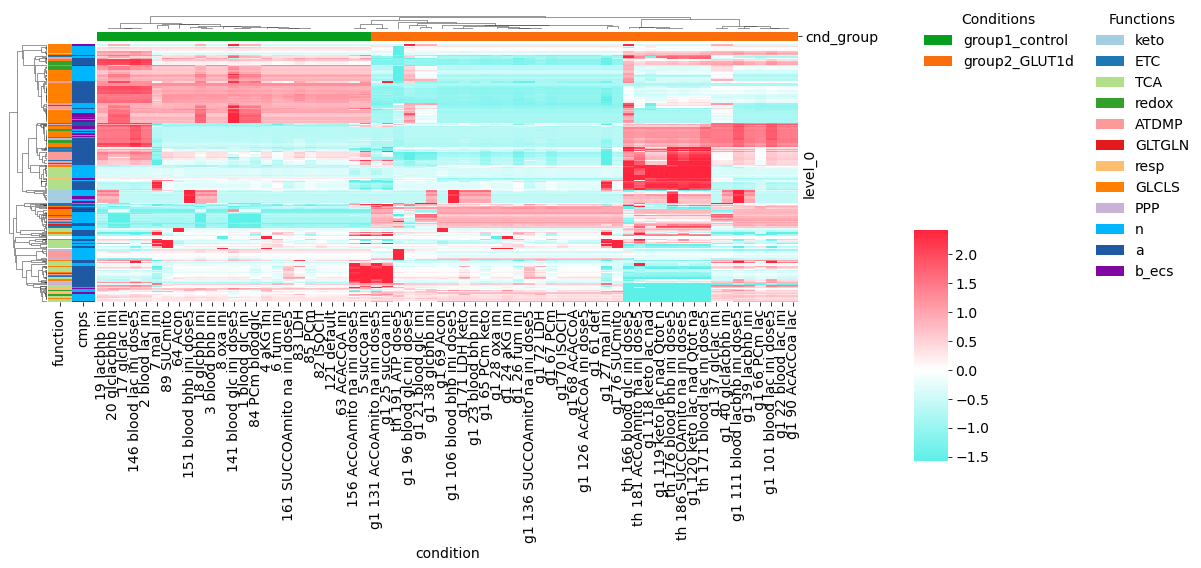

In [52]:
c1 = sns.clustermap(input_df_data2_T, 
                     robust=True, #False,# True,
                    
                    annot=False,
                    
                     row_cluster=True,
                     col_cluster=True,
                    
                    method=cm_method,
                    metric=cm_metric,
                    
                    z_score=0,
                    linewidths=0,  
                    center=0,
                    #vmin=-3,vmax=3,
                    dendrogram_ratio=0.05,
                    
                    figsize=(16,8),
                    cbar_pos=(1, 0.8, 0.05, 0.18),
                    
                    cmap=cmap2,
                    
                    row_colors=color_df_rows_2,
                    col_colors=color_df_cols_2,
                    
                    xticklabels=True, yticklabels=False
                    
           )

# Variables functions legend
for label in lut_funs.keys():
    c1.ax_col_dendrogram.bar(0, 0, color=lut_funs[str(label)], label=label, linewidth=0)
l1 = c1.ax_col_dendrogram.legend(title='Functions', loc="upper right", ncol=1, bbox_to_anchor=(1.05,0.55), frameon=False, bbox_transform=plt.gcf().transFigure)

# Variables cmps legend
for label in lut_cmps.keys():
    c1.ax_col_dendrogram.bar(0, 0, color=lut_cmps[label], label=label, linewidth=0)
l2 = c1.ax_col_dendrogram.legend(title='Functions', loc='upper right', ncol=1, bbox_to_anchor=(1.05, 1), frameon=False, bbox_transform=plt.gcf().transFigure)

# Parameters cnds legend
for label in lut_cnds.keys():
    c1.ax_row_dendrogram.bar(0, 0, color=lut_cnds[label], label=label, linewidth=0)
l3 = c1.ax_row_dendrogram.legend(title='Conditions', loc='upper right', ncol=1, bbox_to_anchor=(0.95, 1),frameon=False,  bbox_transform=plt.gcf().transFigure)

c1.fig.subplots_adjust(right=0.7)
c1.ax_cbar.set_position((0.8, .2, .03, .4))


plt.show()

if savefigures == True:
    c1.savefig(outpath + "fig4a_clustermap_" + timestr +  ".pdf",transparent=True)
    c1.savefig(outpath + "fig4a_clustermap_" + timestr +  ".png",dpi=300, bbox_inches="tight",transparent=False)
else:
    print("savefigures == False")